#Estadistica Aplicada
##Sesion 21, 19 de octubre
###Ivanna Lizeth Rodriguez Ambriz
###1899843
G41

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [48]:
#librerias especialidades
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import  plot_acf
from statsmodels.graphics.tsaplots import  plot_pacf
from statsmodels.graphics.tsaplots import  plot_predict

#modelo ARIMA
import statsmodels.api as sm

##
import pmdarima as pm

In [4]:
df_amazon=pd.read_excel('amazon.xlsx',index_col=0)
df_amazon.head(2)

,amazon
fecha,
2015-01-02,24.573591
2015-01-05,23.830631


In [5]:
#
AMZ=df_amazon.asfreq('B')
#Buissness day- dias habiles
AMZ


,amazon
fecha,
2015-01-02,24.573591
2015-01-05,23.830631
2015-01-06,24.070295
2015-01-07,24.453760
2015-01-08,24.301968
...,...
2019-12-24,52.599163
2019-12-25,NaN
2019-12-26,52.561153


In [6]:
#revisamos missing values
AMZ.isnull().sum()

amazon    47
dtype: int64

(20.0, 40.0)

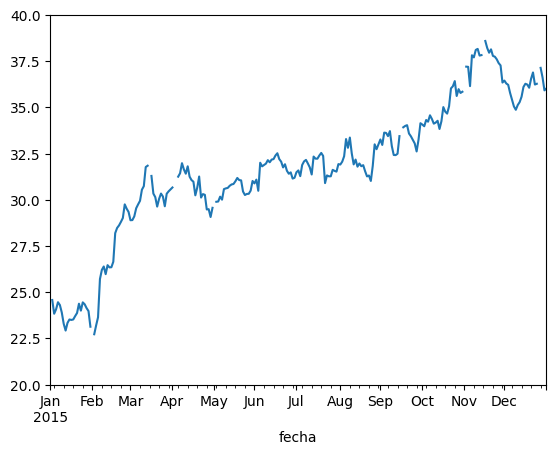

In [7]:
AMZ['amazon'].plot()
plt.xlim('2015-01-01','2015-12-31')
plt.ylim(20,40)

In [8]:
#llanamos missin values
AMZ['amazon']=AMZ['amazon'].fillna(method='pad')

(20.0, 40.0)

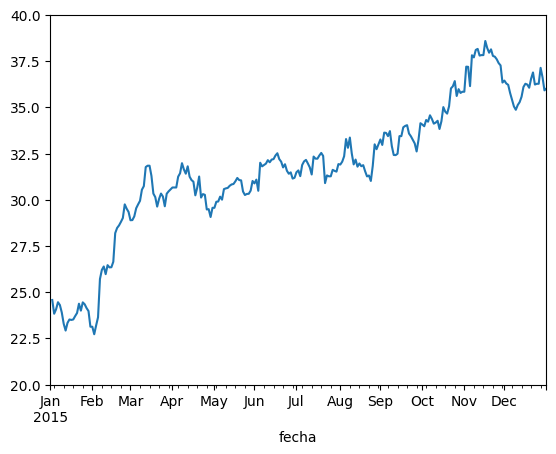

In [9]:
AMZ['amazon'].plot()
plt.xlim('2015-01-01','2015-12-31')
plt.ylim(20,40)

In [10]:
AMZ.tail(1)

,amazon
fecha,
2019-12-30,51.478008


In [11]:
#ultima observacion

##conservamos todas menos la ultima

ultima_obs=AMZ.loc['2019-12-30']

AMZ=AMZ.loc[:'2019-12-27']

AMZ

,amazon
fecha,
2015-01-02,24.573591
2015-01-05,23.830631
2015-01-06,24.070295
2015-01-07,24.453760
2015-01-08,24.301968
...,...
2019-12-23,52.589653
2019-12-24,52.599163
2019-12-25,52.599163


In [12]:
ultima_obs

amazon    51.478008
Name: 2019-12-30 00:00:00, dtype: float64

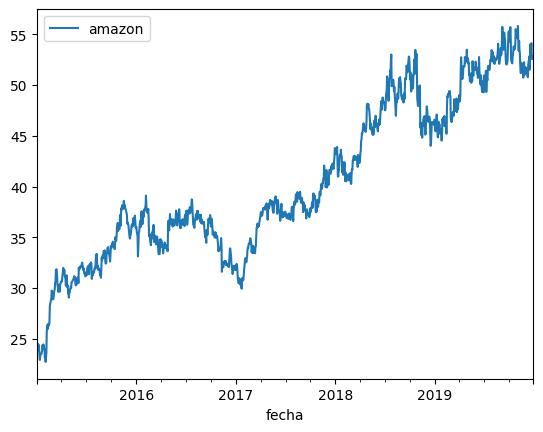

In [13]:
#pronisticamos con todas las observaiones menos la ultima,
#porque vamos a ver que tan cerca o tan lejos queda nuestro pronostico de la ultima observacion


AMZ.plot();

In [14]:
#Probblemente sea un proceso no estacinario, pero vamos  a comprobarlo
#prueba de Dickey-fuller aumentada
prueba_df=adfuller(AMZ['amazon'])
pvalue=prueba_df[1]
pvalue.round(2)

0.52

Dado a que H0=serie no estacionario y H1=proceso estacionario

No rechazamos H0, entonces el precio de la accion de amazon es **NO estacionario**


C:\Users\DELL\AppData\Local\Temp\ipykernel_6524\3765826798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMZ['amazon_diff']=AMZ['amazon'].diff()


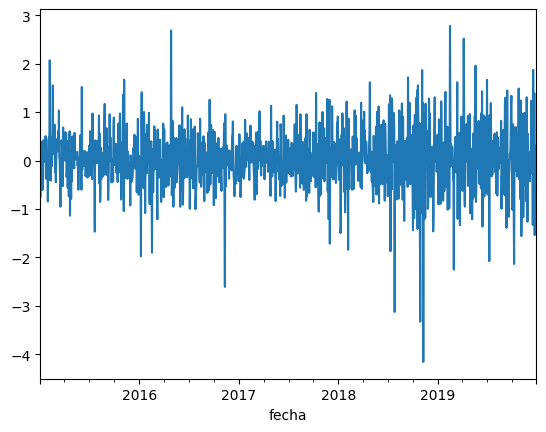

In [15]:
##Calculamos las primeras diferencias para hacerlo estacionario

AMZ['amazon_diff']=AMZ['amazon'].diff()

AMZ['amazon_diff'].plot();

In [16]:
#Hacemos prueba de Dickey-fuller aumentada con las primeras diferencias
prueba_df2=adfuller(AMZ['amazon_diff'].dropna())
pvalue2=prueba_df2[1]
pvalue2.round(2)

0.0

En este cas0 rechazamos H0, entonces las primeras diferencias de la accion de amazon son un **proceso estacionario**

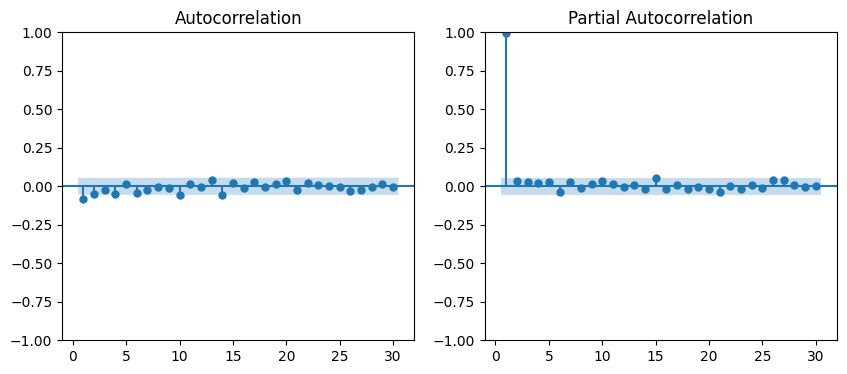

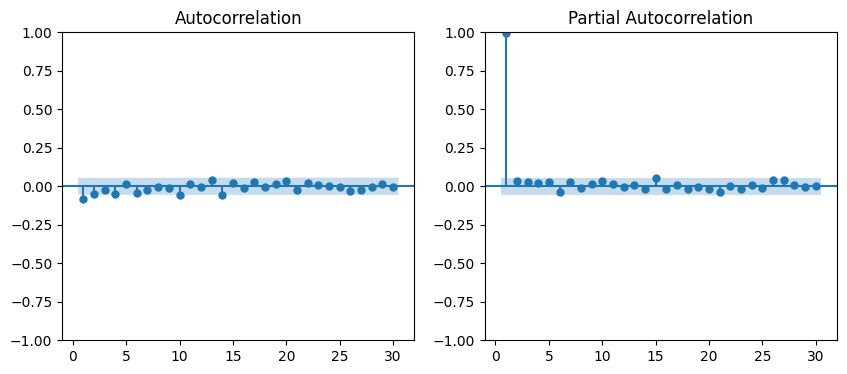

In [17]:
#graficas de autocorrelacion
ig,ax=plt.subplots(1,2,figsize=(10,4))

#1
plot_acf(AMZ['amazon_diff'].dropna(),zero=False,lags=30,ax=ax[0])
#2
plot_pacf(AMZ['amazon'].dropna(),zero=False,lags=30,ax=ax[1])

In [18]:
# vamos a estimar varios modelos y que se guarde el AIC BIC
ic = {}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo = sm.tsa.arima.ARIMA(AMZ['amazon_diff'].dropna(), order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4
AR: 0, MA: 5
AR: 0, MA: 6
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3
AR: 1, MA: 4
AR: 1, MA: 5
AR: 1, MA: 6
AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 2, MA: 3
AR: 2, MA: 4
AR: 2, MA: 5
AR: 2, MA: 6
AR: 3, MA: 0
AR: 3, MA: 1
AR: 3, MA: 2


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3, MA: 3


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 4


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 5


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 6


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 3
AR: 4, MA: 4


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 5


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 6


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 0
AR: 5, MA: 1
AR: 5, MA: 2
AR: 5, MA: 3


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 4


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 5


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 6


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 0
AR: 6, MA: 1
AR: 6, MA: 2
AR: 6, MA: 3


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 4


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 5


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 6


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [19]:
ic.sort_values('AIC').head(1)

,,AIC,BIC
AR,MA,,
1,1,2370.719104,2391.399582


-Amazon diff es un ARMA (1,1)=ARIMA(1,0,1)

-Las acciones de amazon son una ARIMA (1,1,1) -> ES INTEGRADO DE ORDEN 1

In [20]:
#Verificaremos el creiterio bayesiano de info para ver si es el mismo modelo
ic.sort_values('BIC').head(1)

,,AIC,BIC
AR,MA,,
1,1,2370.719104,2391.399582


Por lo tanto el BIC tambien sugiere que

-Amazon diff es un ARMA (1,1)=ARIMA(1,0,1)

-Las acciones de amazon son una ARIMA (1,1,1) -> ES INTEGRADO DE ORDEN 1

In [28]:
#que orden son las acciones 
#   pm.auto_arima(base_datos['columna'].dropna(),
#              start_p=N,max_p=M,
#             start_q=N,max_1=M,
#              ic='AIC' o 'BIC'  segun el criterio que queramos
#              seasonal=False)

In [26]:
#que orden son las acciones de las primeras diferencias de amazon
pm.auto_arima(AMZ['amazon_diff'].dropna(),
              start_p=1,max_p=7,
              start_q=1,max_1=7,
              seasonal=False)

ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True)

In [27]:
#que orden son las acciones de amazon
pm.auto_arima(AMZ['amazon'].dropna(),
              start_p=1,max_p=7,
              start_q=1,max_1=7,
              seasonal=False)

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True)

In [56]:
#estimamos modelo

model =sm.tsa.arima.ARIMA((AMZ['amazon']),order=(1,1,1))
results_model = model.fit()
print(results_model.summary())

                               SARIMAX Results                                
Dep. Variable:                 amazon   No. Observations:                 1301
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1183.529
Date:                Mon, 23 Oct 2023   AIC                           2373.058
Time:                        14:59:54   BIC                           2388.569
Sample:                    01-02-2015   HQIC                          2378.878
                         - 12-27-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7500      0.071     10.517      0.000       0.610       0.890
ma.L1         -0.8375      0.059    -14.285      0.000      -0.952      -0.723
sigma2         0.3616      0.008     43.599      0.0

In [60]:
results_model.predict('2019-12-28','2020-01-05')

2019-12-30    52.847340
2019-12-31    52.833947
2020-01-01    52.823902
2020-01-02    52.816367
2020-01-03    52.810716
2020-01-06    52.806477
Freq: B, Name: predicted_mean, dtype: float64

In [61]:
AMZ.tail(1)

,amazon,amazon_diff
fecha,,
2019-12-27,52.865196,0.304043


Pronosticamos que el 30 de diciembre de 2019 el precio de la accion de amazon se emcuemtre en 52.84

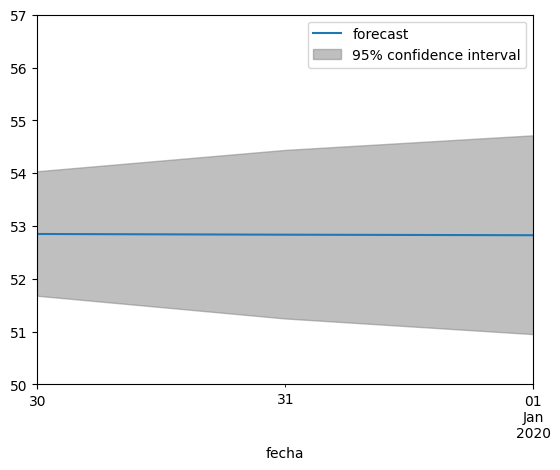

In [63]:
#graficamos el modelo
plot_predict(results_model,start='2019-12-28',end='2020-01-05')
AMZ['amazon'].plot()
plt.xlim('2019-12-28','2020-01-01')
plt.ylim(50,57);